In [3]:
import torch
import torch.nn as nn
from torch.nn import functional as F
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hideen = nn.Linear(20, 256)
        self.out=nn.Linear(256,10)

    def forward(self, x):
        x = F.relu(self.hideen(x))
        x = self.out(x)
        return x
net=MLP()
x=torch.randn(2,20)
print(net(x))
    

tensor([[ 0.3236,  0.3674, -0.0912,  0.0637, -0.5579,  0.1535,  0.0267,  0.3575,
         -0.2457, -0.7638],
        [ 0.1496,  0.1246,  0.2291, -0.3867, -0.2369,  0.0013,  0.1428,  0.2640,
         -0.4345, -0.5585]], grad_fn=<AddmmBackward0>)


In [21]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            self._modules[str(idx)] = module
    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X
    
net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
net(x)

tensor([[ 0.2757, -0.2914, -0.0245, -0.2640, -0.2423,  0.0501,  0.2645, -0.0368,
          0.1915,  0.0243],
        [ 0.0587, -0.0826, -0.1038, -0.0118,  0.1037, -0.1250,  0.0468, -0.0944,
          0.0566,  0.1196]], grad_fn=<AddmmBackward0>)

In [23]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # 不计算梯度的随机权重参数。因此其在训练期间保持不变
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):
        X = self.linear(X)
        # 使用创建的常量参数以及relu和mm函数
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

In [44]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20, 64), nn.ReLU(),
                                 nn.Linear(64, 32), nn.ReLU())
        self.linear = nn.Linear(32, 16)

    def forward(self, X):
        return self.linear(self.net(X))

chimera = nn.Sequential(NestMLP(), nn.Linear(16, 20), FixedHiddenMLP())
chimera(x)

tensor(0.1054, grad_fn=<SumBackward0>)

In [48]:
import torch
from torch import nn

net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 1))
X = torch.rand(size=(2, 4))
net(X)
print(net[2].state_dict())
print(type(net[2].bias))
print(net[2].bias)
print(net[2].bias.data)
net[2].weight.grad == None

OrderedDict([('weight', tensor([[ 0.2833, -0.1206, -0.0320, -0.2814,  0.3383,  0.2589, -0.0441, -0.2142]])), ('bias', tensor([0.1559]))])
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([0.1559], requires_grad=True)
tensor([0.1559])


True

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

# 创建一个简单的模型
model = nn.Linear(10, 1)  # 输入维度 10，输出维度 1

# 使用 SGD 优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 假设有一些输入数据和目标输出
inputs = torch.randn(5, 10)  # 5 个样本，每个样本 10 个特征
targets = torch.randn(5, 1)   # 5 个目标输出

# 训练步骤
for epoch in range(100):  # 进行 100 次训练迭代
    model.train()  # 设置模型为训练模式
    optimizer.zero_grad()  # 清零梯度

    outputs = model(inputs)  # 前向传播
    loss = nn.MSELoss()(outputs, targets)  # 计算损失
    loss.backward()  # 反向传播计算梯度
    optimizer.step()  # 更新参数

    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.1677417755126953
Epoch 2, Loss: 1.0152370929718018
Epoch 3, Loss: 0.8834996223449707
Epoch 4, Loss: 0.7696511149406433
Epoch 5, Loss: 0.6712152361869812
Epoch 6, Loss: 0.5860612988471985
Epoch 7, Loss: 0.5123559832572937
Epoch 8, Loss: 0.44852137565612793
Epoch 9, Loss: 0.39319953322410583
Epoch 10, Loss: 0.34522122144699097
Epoch 11, Loss: 0.3035801351070404
Epoch 12, Loss: 0.26740962266921997
Epoch 13, Loss: 0.23596343398094177
Epoch 14, Loss: 0.20859870314598083
Epoch 15, Loss: 0.18476179242134094
Epoch 16, Loss: 0.16397535800933838
Epoch 17, Loss: 0.1458282321691513
Epoch 18, Loss: 0.1299659013748169
Epoch 19, Loss: 0.11608264595270157
Epoch 20, Loss: 0.10391481220722198
Epoch 21, Loss: 0.0932348370552063
Epoch 22, Loss: 0.08384642004966736
Epoch 23, Loss: 0.07558004558086395
Epoch 24, Loss: 0.06828925013542175
Epoch 25, Loss: 0.06184755638241768
Epoch 26, Loss: 0.0561455599963665
Epoch 27, Loss: 0.05108867958188057
Epoch 28, Loss: 0.04659502953290939
Epoch 29, Los

In [51]:
import torch
from torch import nn
from torch.nn import functional as F

x = torch.arange(4)
torch.save(x, 'x-file')
x2 = torch.load('x-file')
x2

tensor([0, 1, 2, 3])

In [52]:
y = torch.zeros(4)
torch.save([x, y],'x-files')
x2, y2 = torch.load('x-files')
(x2, y2)

(tensor([0, 1, 2, 3]), tensor([0., 0., 0., 0.]))

In [53]:
mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([0, 1, 2, 3]), 'y': tensor([0., 0., 0., 0.])}

In [54]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))

net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)
torch.save(net.state_dict(), 'mlp.params')

In [55]:
clone = MLP()
clone.load_state_dict(torch.load('mlp.params'))
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [56]:
Y_clone = clone(X)
Y_clone == Y

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

epoch 50, x1: 0.235600, x2: -0.062777


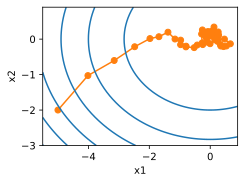

In [1]:
import math
import torch
from d2l import torch as d2l

def f(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 目标函数的梯度
    return 2 * x1, 4 * x2
    
def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)
    
def constant_lr():
    return 1
eta = 0.1
lr = constant_lr  # 常数学习速度
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

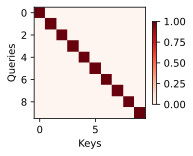

In [4]:
import torch
from d2l import torch as d2l


def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
                                 
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
                
    fig.colorbar(pcm, ax=axes, shrink=0.6);
    
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

In [5]:
import torch
from torch import nn
from d2l import torch as d2l
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本
def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [1]:
"""
---
title: U-Net
summary: >
    PyTorch implementation and tutorial of U-Net model.
---

# U-Net

This is an implementation of the U-Net model from the paper,
[U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597).

U-Net consists of a contracting path and an expansive path.
The contracting path is a series of convolutional layers and pooling layers,
where the resolution of the feature map gets progressively reduced.
Expansive path is a series of up-sampling layers and convolutional layers
where the resolution of the feature map gets progressively increased.

At every step in the expansive path the corresponding feature map from the contracting path
concatenated with the current feature map.

![U-Net diagram from paper](unet.png)

Here is the [training code](experiment.html) for an experiment that trains a U-Net
on [Carvana dataset](carvana.html).
"""
import torch
import torchvision.transforms.functional
from torch import nn


class DoubleConvolution(nn.Module):
    """
    ### Two $3 \times 3$ Convolution Layers

    Each step in the contraction path and expansive path have two $3 \times 3$
    convolutional layers followed by ReLU activations.

    In the U-Net paper they used $0$ padding,
    but we use $1$ padding so that final feature map is not cropped.
    """

    def __init__(self, in_channels: int, out_channels: int):
        """
        :param in_channels: is the number of input channels
        :param out_channels: is the number of output channels
        """
        super().__init__()

        # First $3 \times 3$ convolutional layer
        self.first = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()
        # Second $3 \times 3$ convolutional layer
        self.second = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()

    def forward(self, x: torch.Tensor):
        # Apply the two convolution layers and activations
        x = self.first(x)
        x = self.act1(x)
        x = self.second(x)
        return self.act2(x)


class DownSample(nn.Module):
    """
    ### Down-sample

    Each step in the contracting path down-samples the feature map with
    a $2 \times 2$ max pooling layer.
    """

    def __init__(self):
        super().__init__()
        # Max pooling layer
        self.pool = nn.MaxPool2d(2)

    def forward(self, x: torch.Tensor):
        return self.pool(x)


class UpSample(nn.Module):
    """
    ### Up-sample

    Each step in the expansive path up-samples the feature map with
    a $2 \times 2$ up-convolution.
    """
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()

        # Up-convolution
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

    def forward(self, x: torch.Tensor):
        return self.up(x)


class CropAndConcat(nn.Module):
    """
    ### Crop and Concatenate the feature map

    At every step in the expansive path the corresponding feature map from the contracting path
    concatenated with the current feature map.
    """
    def forward(self, x: torch.Tensor, contracting_x: torch.Tensor):
        """
        :param x: current feature map in the expansive path
        :param contracting_x: corresponding feature map from the contracting path
        """

        # Crop the feature map from the contracting path to the size of the current feature map
        contracting_x = torchvision.transforms.functional.center_crop(contracting_x, [x.shape[2], x.shape[3]])
        # Concatenate the feature maps
        x = torch.cat([x, contracting_x], dim=1)
        #
        return x


class UNet(nn.Module):
    """
    ## U-Net
    """
    def __init__(self, in_channels: int, out_channels: int):
        """
        :param in_channels: number of channels in the input image
        :param out_channels: number of channels in the result feature map
        """
        super().__init__()

        # Double convolution layers for the contracting path.
        # The number of features gets doubled at each step starting from $64$.
        self.down_conv = nn.ModuleList([DoubleConvolution(i, o) for i, o in
                                        [(in_channels, 64), (64, 128), (128, 256), (256, 512)]])
        # Down sampling layers for the contracting path
        self.down_sample = nn.ModuleList([DownSample() for _ in range(4)])

        # The two convolution layers at the lowest resolution (the bottom of the U).
        self.middle_conv = DoubleConvolution(512, 1024)

        # Up sampling layers for the expansive path.
        # The number of features is halved with up-sampling.
        self.up_sample = nn.ModuleList([UpSample(i, o) for i, o in
                                        [(1024, 512), (512, 256), (256, 128), (128, 64)]])
        # Double convolution layers for the expansive path.
        # Their input is the concatenation of the current feature map and the feature map from the
        # contracting path. Therefore, the number of input features is double the number of features
        # from up-sampling.
        self.up_conv = nn.ModuleList([DoubleConvolution(i, o) for i, o in
                                      [(1024, 512), (512, 256), (256, 128), (128, 64)]])
        # Crop and concatenate layers for the expansive path.
        self.concat = nn.ModuleList([CropAndConcat() for _ in range(4)])
        # Final $1 \times 1$ convolution layer to produce the output
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x: torch.Tensor):
        """
        :param x: input image
        """
        # To collect the outputs of contracting path for later concatenation with the expansive path.
        pass_through = []
        # Contracting path
        for i in range(len(self.down_conv)):
            # Two $3 \times 3$ convolutional layers
            x = self.down_conv[i](x)
            # Collect the output
            pass_through.append(x)
            # Down-sample
            x = self.down_sample[i](x)

        # Two $3 \times 3$ convolutional layers at the bottom of the U-Net
        x = self.middle_conv(x)

        # Expansive path
        for i in range(len(self.up_conv)):
            # Up-sample
            x = self.up_sample[i](x)
            # Concatenate the output of the contracting path
            x = self.concat[i](x, pass_through.pop())
            # Two $3 \times 3$ convolutional layers
            x = self.up_conv[i](x)

        # Final $1 \times 1$ convolution layer
        x = self.final_conv(x)

        #
        return x
        

if __name__ == "__main__":
# 创建模型实例
    input_channels = 7
    output_channels = 1  
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = UNet(input_channels, output_channels).to(device)
    input_data = torch.randn(1,input_channels ,256, 256).to(device)
    output = model(input_data)
    print(output.shape)

torch.Size([1, 1, 256, 256])


In [5]:

from torch import nn
from pathlib import Path

import torch.utils.data
import torchvision.transforms.functional
from PIL import Image

from labml import lab


class CarvanaDataset(torch.utils.data.Dataset):
    """
    ## Carvana Dataset
    """

    def __init__(self, image_path: Path, mask_path: Path):
        """
        :param image_path: is the path to the images
        :param mask_path: is the path to the masks
        """
        # Get a dictionary of images by id
        self.images = {p.stem: p for p in image_path.iterdir()}
        # Get a dictionary of masks by id
        self.masks = {p.stem[:-5]: p for p in mask_path.iterdir()}

        # Image ids list
        self.ids = list(self.images.keys())

        # Transformations
        self.transforms = torchvision.transforms.Compose([
            torchvision.transforms.Resize(572),
            torchvision.transforms.ToTensor(),
        ])

    def __getitem__(self, idx: int):
        """
        #### Get an image and its mask.

        :param idx: is index of the image
        """

        # Get image id
        id_ = self.ids[idx]
        # Load image
        image = Image.open(self.images[id_])
        # Transform image and convert it to a PyTorch tensor
        image = self.transforms(image)
        # Load mask
        mask = Image.open(self.masks[id_])
        # Transform mask and convert it to a PyTorch tensor
        mask = self.transforms(mask)

        # The mask values were not $1$, so we scale it appropriately.
        mask = mask / mask.max()

        # Return the image and the mask
        return image, mask

    def __len__(self):
        """
        #### Size of the dataset
        """
        return len(self.ids)


# Testing code
if __name__ == '__main__':
    ds = CarvanaDataset(lab.get_data_path() / 'image' , lab.get_data_path() / 'masks')

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'E:\\repository\\data\\masks'

In [35]:
#自制unet代码
import torch
import torchvision.transforms.functional
from torch import nn


class Doubleconv(nn.Module):
    def __init__(self, in_channels:int, out_channels:int):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
    def forward(self, x: torch.Tensor):
        return self.conv(x)
        
    
class Downsample(nn.Module):
    def __init__(self):
        super().__init__()
        self.maxpool_conv = nn.MaxPool2d(2)
        
    def forward(self, x: torch.Tensor):
        return self.maxpool_conv(x)


class Up(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.conv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
    
    def forward(self, x: torch.Tensor):
        return self.conv(x)
   


class crop_and_concat(nn.Module):
    def forward(self, x: torch.Tensor, contracting_x: torch.Tensor):
        contracting_x= torchvision.transforms.functional.center_crop(contracting_x, [x.shape[2], x.shape[3]])
        x = torch.cat([x, contracting_x], dim=1)
        return x



class UNet(nn.Module):
    def __init__(self, in_channels:int, out_channels:int):
        super().__init__()

        self.down_conv= nn.ModuleList([
    Doubleconv(i, o) for i, o in 
    [(in_channels, 64), (64, 128), (128, 256), (256, 512)]
])

        self.down_sample = nn.ModuleList([Downsample() for _ in range(4)])
        self.middle_conv = Doubleconv(512, 1024)
        self.up_sample = nn.ModuleList([
    Up(i, o) for i, o in
     [(1024, 512), (512, 256), (256, 128), (128, 64)]

    ])
        self.up_conv= nn.ModuleList([
   Doubleconv(i, o) for i, o in [(1024, 512), (512, 256), (256, 128), (128, 64)]
    ])
        self.concat = nn.ModuleList([crop_and_concat() for _ in range(4)])
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x: torch.Tensor):
        
        pass_through = []
        print(len(self.down_conv))
        for i in range(len(self.down_conv)):
            x = self.down_conv[i](x)
            pass_through.append(x)
            x = self.down_sample[i](x)
            
            
        x = self.middle_conv(x)
        

        for i in range(len(self.up_conv)):
            x = self.up_sample[i](x)
            x = self.concat[i](x, pass_through.pop())
            x = self.up_conv[i](x)
           
        x = self.final_conv(x)
    
        return x
        

        
#实例化
if __name__ == "__main__":
# 创建模型实例
    input_channels = 3
    output_channels = 1 
     
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = UNet(input_channels, output_channels).to(device)
    input_data = torch.randn(1,input_channels ,256, 256).to(device)
    output = model(input_data)
    print(output.shape)
         

         

4
torch.Size([1, 1, 256, 256])


In [52]:
import torch
import torchvision.transforms.functional
from torch import nn


class DoubleConvolution(nn.Module):


    def __init__(self, in_channels: int, out_channels: int):
      
        super().__init__()

        # First $3 \times 3$ convolutional layer
        self.first = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()
        # Second $3 \times 3$ convolutional layer
        self.second = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()

    def forward(self, x: torch.Tensor):
        # Apply the two convolution layers and activations
        x = self.first(x)
        x = self.act1(x)
        x = self.second(x)
        return self.act2(x)


class DownSample(nn.Module):

    def __init__(self):
        super().__init__()
        # Max pooling layer
        self.pool = nn.MaxPool2d(2)

    def forward(self, x: torch.Tensor):
        return self.pool(x)


class UpSample(nn.Module):

    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()

        # Up-convolution
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

    def forward(self, x: torch.Tensor):
        return self.up(x)


class CropAndConcat(nn.Module):
  
   
    def forward(self, x: torch.Tensor, contracting_x: torch.Tensor):
     

        # Crop the feature map from the contracting path to the size of the current feature map
        contracting_x = torchvision.transforms.functional.center_crop(contracting_x, [x.shape[2], x.shape[3]])
        # Concatenate the feature maps
        x = torch.cat([x, contracting_x], dim=1)
        #
        return x


class UNet(nn.Module):

    def __init__(self, in_channels: int, out_channels: int):
  
        super().__init__()

    
        self.down_conv = nn.ModuleList([DoubleConvolution(i, o) for i, o in
                                        [(in_channels, 64), (64, 128), (128, 256), (256, 512)]])
    
        self.down_sample = nn.ModuleList([DownSample() for _ in range(4)])

        self.middle_conv = DoubleConvolution(512, 1024)

     
        self.up_sample = nn.ModuleList([UpSample(i, o) for i, o in
                                        [(1024, 512), (512, 256), (256, 128), (128, 64)]])
   
        self.up_conv = nn.ModuleList([DoubleConvolution(i, o) for i, o in
                                      [(1024, 512), (512, 256), (256, 128), (128, 64)]])
   
        self.concat = nn.ModuleList([CropAndConcat() for _ in range(4)])
   
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x: torch.Tensor):
     
        pass_through = []
        # Contracting path
        for i in range(len(self.down_conv)):
            # Two $3 \times 3$ convolutional layers
            x = self.down_conv[i](x)
            # Collect the output
            pass_through.append(x)
            # Down-sample
            x = self.down_sample[i](x)
            
        # Two $3 \times 3$ convolutional layers at the bottom of the U-Net
        x = self.middle_conv(x)
        
        # Expansive path
        for i in range(len(self.up_conv)):
            # Up-sample
            x = self.up_sample[i](x)
            # Concatenate the output of the contracting path
            x = self.concat[i](x, pass_through.pop())
            # Two $3 \times 3$ convolutional layers
            x = self.up_conv[i](x)
            
        # Final $1 \times 1$ convolution layer
        x = self.final_conv(x)

        #
        return x

from PIL import Image
import torchvision.transforms as transforms


image_path = r'E:\数据集\山体滑坡数据集\landslide\image1\df002.png'  # 替换为你的图片路径
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    # 你还可以在这里添加其他变换，例如:
    transforms.Resize((256, 256)),  # 调整图像大小
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 归一化
])
image_tensor = transform(image)


image_tensor = image_tensor.unsqueeze(0)

print(image_tensor.shape)

#实例化
if __name__ == "__main__":
# 创建模型实例
    input_channels = 7
    output_channels = 1  
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = UNet(input_channels, output_channels).to(device)
    model1 = UNet(3,1).to(device)
    image_tensor=image_tensor.to(device)
    input_data = torch.randn(1,input_channels ,256, 256).to(device)
    print(input_data.shape)
    output = model(input_data)
    output1= model1(image_tensor)
    print(output.shape)
    print(output1.shape)
    print(output1)

    

C:\Users\龙儿璨\AppData\Roaming\Python\Python39\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 3, 256, 256])
torch.Size([1, 7, 256, 256])
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
tensor([[[[-0.1008, -0.1012, -0.1003,  ..., -0.0986, -0.1009, -0.1009],
          [-0.1034, -0.1043, -0.1024,  ..., -0.1009, -0.0998, -0.0975],
          [-0.1069, -0.1056, -0.1017,  ..., -0.0985, -0.0976, -0.0952],
          ...,
          [-0.1073, -0.1047, -0.1017,  ..., -0.0977, -0.0959, -0.0947],
          [-0.1054, -0.1019, -0.0996,  ..., -0.0970, -0.0966, -0.0957],
          [-0.1068, -0.1040, -0.1003,  ..., -0.1001, -0.0979, -0.0947]]]],
       device='cuda:0', grad_fn=<ConvolutionBackward0>)


In [5]:
import torch

# 创建两个模拟张量，假设是 RGB 图像，形状为 (C, H, W)
x = torch.randn(3, 64, 64)  # 3个通道的图像 (C1)
contracting_x = torch.randn(2, 64, 64)  # 2个通道的图像 (C2)

# 使用 torch.cat 在通道维度上拼接
x = torch.cat([x, contracting_x], dim=0)  # 注意这里的 dim=0 因为我们要拼接通道

print(x.shape)  # 

torch.Size([5, 64, 64])
